# Age pyramid examples

We will use a U.S. age pyramid and a Nigerian age pyramid for examples.

In [ ]:
from pathlib import Path
from IPython.display import Image
Image(filename="Nigeria-2024.png")
Image(filename="UnitedStates-2024.png")
import numpy as np

from laser_core.demographics import AliasedDistribution
from laser_core.demographics import load_pyramid_csv


## Nigeria

Source: https://www.populationpyramid.net/nigeria/2024/

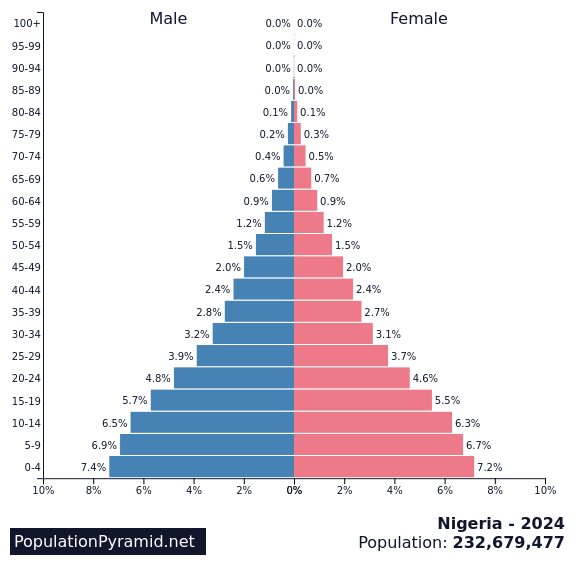

In [ ]:
MCOL = 2
FCOL = 3

MINCOL = 0
MAXCOL = 1

nigeria = load_pyramid_csv(Path.cwd() / "Nigeria-2024.csv")
sampler = AliasedDistribution(nigeria[:, MCOL])    # We'll use the male population in this example.
n_agents = 100_000
samples = sampler.sample(n_agents)              # Sample 100,000 people from the distribution.
# samples will be bin indices, so we need to convert them to ages.
bin_min_age_days = nigeria[:, MINCOL] * 365          # minimum age for bin, in days (include this value)
bin_max_age_days = (nigeria[:, MAXCOL] + 1) * 365    # maximum age for bin, in days (exclude this value)
mask = np.zeros(n_agents, dtype=bool)
ages = np.zeros(n_agents, dtype=np.int32)
for i in range(len(nigeria)):   # for each possible bin value...
    mask[:] = samples == i      # ...find the agents that belong to this bin
    # ...and assign a random age, in days, within the bin
    ages[mask] = np.random.randint(bin_min_age_days[i], bin_max_age_days[i], mask.sum())


In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plot histogram of samples on primary y-axis

fraction = nigeria[:, MCOL]/nigeria[:, MCOL:FCOL+1].sum()
ax1.plot(fraction, color="green")
ax1.set_xlabel("Age Bin")
bins = [f"{i, j}" for i, j in zip(nigeria[:, MINCOL], nigeria[:, MAXCOL])]
plt.xticks(rotation=90)
ax1.set_xticks(ticks=range(len(bins)), labels=bins)
ax1.set_ylim(-0.01, 0.1)
ax1.set_ylabel("% Population (Input)", color="green")

# Create secondary y-axis
ax2 = ax1.twinx()

# We will calculate the histogram manually because the final bin isn't the same width as the others.
histogram = np.zeros(21, dtype=np.int32)
for i in range(histogram.shape[0]):
    mask = (ages // 1825) == i  # Convert ages in days to 5-year bin indices
    histogram[i] = mask.sum()

scale = nigeria[:,MCOL].sum() / nigeria[:,MCOL:FCOL+1].sum()   # male / male+female
fraction = (histogram*scale)/histogram.sum()
ax2.plot(range(histogram.shape[0]), fraction, color="orange", marker="x")
ax2.set_ylim(-0.01, 0.1)
ax2.set_ylabel("% Population (Sampled)", color="orange")

plt.title("Age Distribution in Nigeria")
plt.show()

## United States

Source: https://www.populationpyramid.net/united-states-of-america/2024/

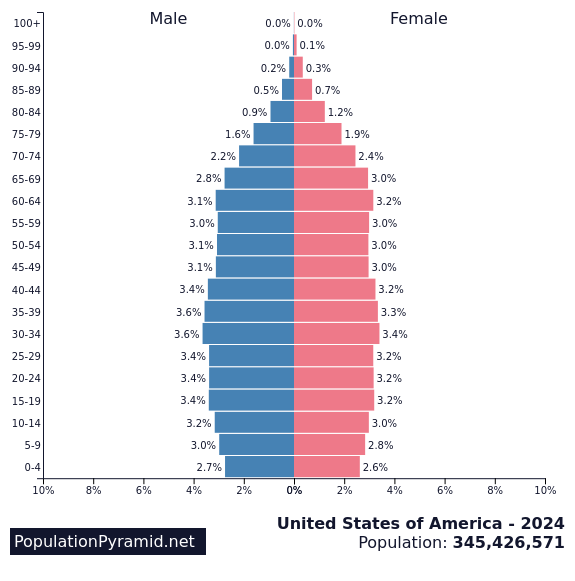

In [ ]:
america = load_pyramid_csv(Path.cwd() / "United States of America-2024.csv")
sampler = AliasedDistribution(america[:, FCOL])    # We'll use the female population in this example.
n_agents = 100_000
samples = sampler.sample(n_agents)              # Sample 100,000 people from the distribution.
# samples will be bin indices, so we need to convert them to ages.
bin_min_age_days = america[:, MINCOL] * 365          # minimum age for bin, in days (include this value)
bin_max_age_days = (america[:, MAXCOL] + 1) * 365    # maximum age for bin, in days (exclude this value)
mask = np.zeros(n_agents, dtype=bool)
ages = np.zeros(n_agents, dtype=np.int32)
for i in range(len(america)):   # for each possible bin value...
    mask[:] = samples == i      # ...find the agents that belong to this bin
    # ...and assign a random age, in days, within the bin
    ages[mask] = np.random.randint(bin_min_age_days[i], bin_max_age_days[i], mask.sum())


In [ ]:
fig, ax1 = plt.subplots()

# Plot histogram of samples on primary y-axis

fraction = america[:, FCOL]/america[:, MCOL:FCOL+1].sum()
ax1.plot(fraction, color="g")
ax1.set_xlabel("Age Bin")
plt.xticks(rotation=90)
bins = [f"{i, j}" for i, j in zip(america[:, MINCOL], america[:, MAXCOL])]
ax1.set_xticks(ticks=range(len(bins)), labels=bins)
ax1.set_ylim(-0.01, 0.05)
ax1.set_ylabel("% Population (Input)", color="g")

# We will calculate the histogram manually because the final bin isn't the same width as the others.
histogram = np.zeros(21, dtype=np.int32)
for i in range(histogram.shape[0]):
    mask = (ages // 1825) == i  # Convert ages in days to 5-year bin indices
    histogram[i] = mask.sum()

# Create secondary y-axis
ax2 = ax1.twinx()
scale = america[:,FCOL].sum() / america[:,MCOL:FCOL+1].sum()   # female / male+female
fraction = (histogram*scale)/histogram.sum()
ax2.plot(range(histogram.shape[0]), fraction, color="orange", marker="x")
ax2.set_ylabel("% Population (Sampled)", color="orange")
ax2.set_ylim(-0.01, 0.05)


plt.title("Age Distribution in the United States")
plt.show()